(b) Define the p.d.f.s and verify the normalisation.

In [2]:
from src.distribution import PDF

# verify with default parameters
print("Verify normalisation with default parameters:")
results = PDF().verify()

# verify with different parameters
test_params = [ {'mu': 2.5, 'sigma': 0.6, 'f': 0.4},
                {'lamda': 0.5, 'mu_b': 1.3, 'sigma_b': 2.1}]
    
for i, params in enumerate(test_params, 1):
    print(f"\nVerify normalisation with parameters group {i}:")
    results = PDF(**params).verify()

Verify normalisation with default parameters:
g_s(x) pdf integral: 1.0000
h_s(y) pdf integral: 1.0000
g_b(x) pdf integral: 1.0000
h_b(y) pdf integral: 1.0000
signal pdf integral: 1.0000
background integral: 1.0000


KeyboardInterrupt: 

(c) Plot the distributions.

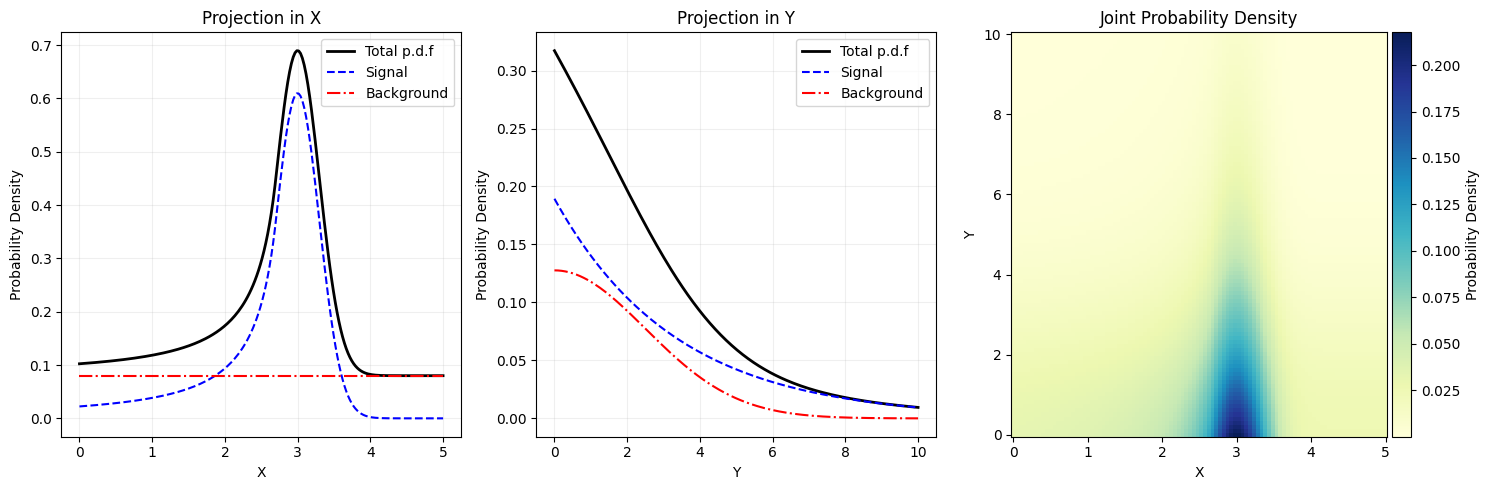

In [ ]:
from src.distribution import PDF
import matplotlib.pyplot as plt

fig = PDF().plot()
plt.show()

(d) Generate the samples and perform an extended maximum likelihood fit.

In [ ]:
from src.generation import Generator
from src.fitting import Fitter
import timeit
import numpy as np

n = 100000    # sample size
trials = 100  # number of calls
true_params = np.array([3, 0.3, 1, 1.4, 0.6, 0.3, 0, 2.5])  # model params

# normal distribution
normal_time = timeit.timeit(
    'np.random.normal(size=100000)',
    number=trials,
    globals={'np': np}) / trials

# sample generation
generator = Generator(true_params)
gen_time = timeit.timeit(
    'generator.generate_sample(n)',
    number=trials,
    globals={'generator': generator, 'n': n}) / trials

# fitting
x, y = generator.generate_sample(n)
fitter = Fitter(x, y)
fit_time = timeit.timeit(
    'fitter.fit()',
    number=trials,
    globals={'fitter': fitter, 'true_params': true_params}) / trials

result = {'norm_time': normal_time,
        'generation_time': gen_time,
        'fitting_time': fit_time,
        'generation_factor': gen_time / normal_time,
        'fitting_factor': fit_time / normal_time}
    
print("\nThe execution times:")
print(f"Normal distribution: {result['norm_time']:.4f} seconds")
print(f"Sample generation: {result['generation_time']:.4f} seconds "
        f"({result['generation_factor']:.2f}x first one)")
print(f"Parameter fitting: {result['fitting_time']:.4f} seconds "
        f"({result['fitting_factor']:.2f}x first one)")


The execution times:
Normal distribution: 0.0014 seconds
Sample generation: 0.0228 seconds (15.97x first one)
Parameter fitting: 33.1362 seconds (23206.68x first one)


(e) Run a simulation study using parametric bootstrapping.

Analysing sample sizes:  20%|██        | 1/5 [10:02<40:08, 602.01s/it]

Analysing sample sizes: 100%|██████████| 5/5 [48:36<00:00, 583.21s/it]


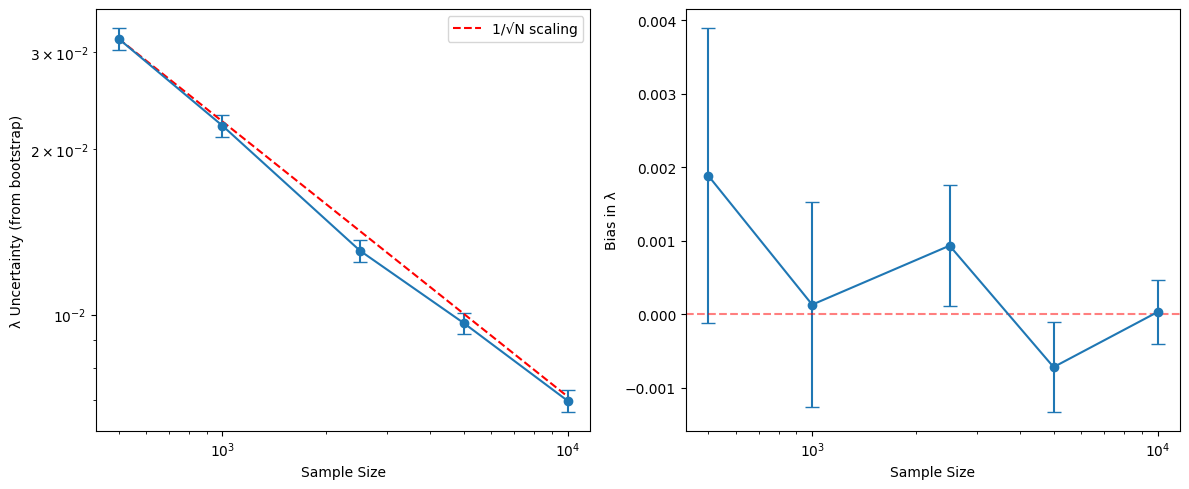

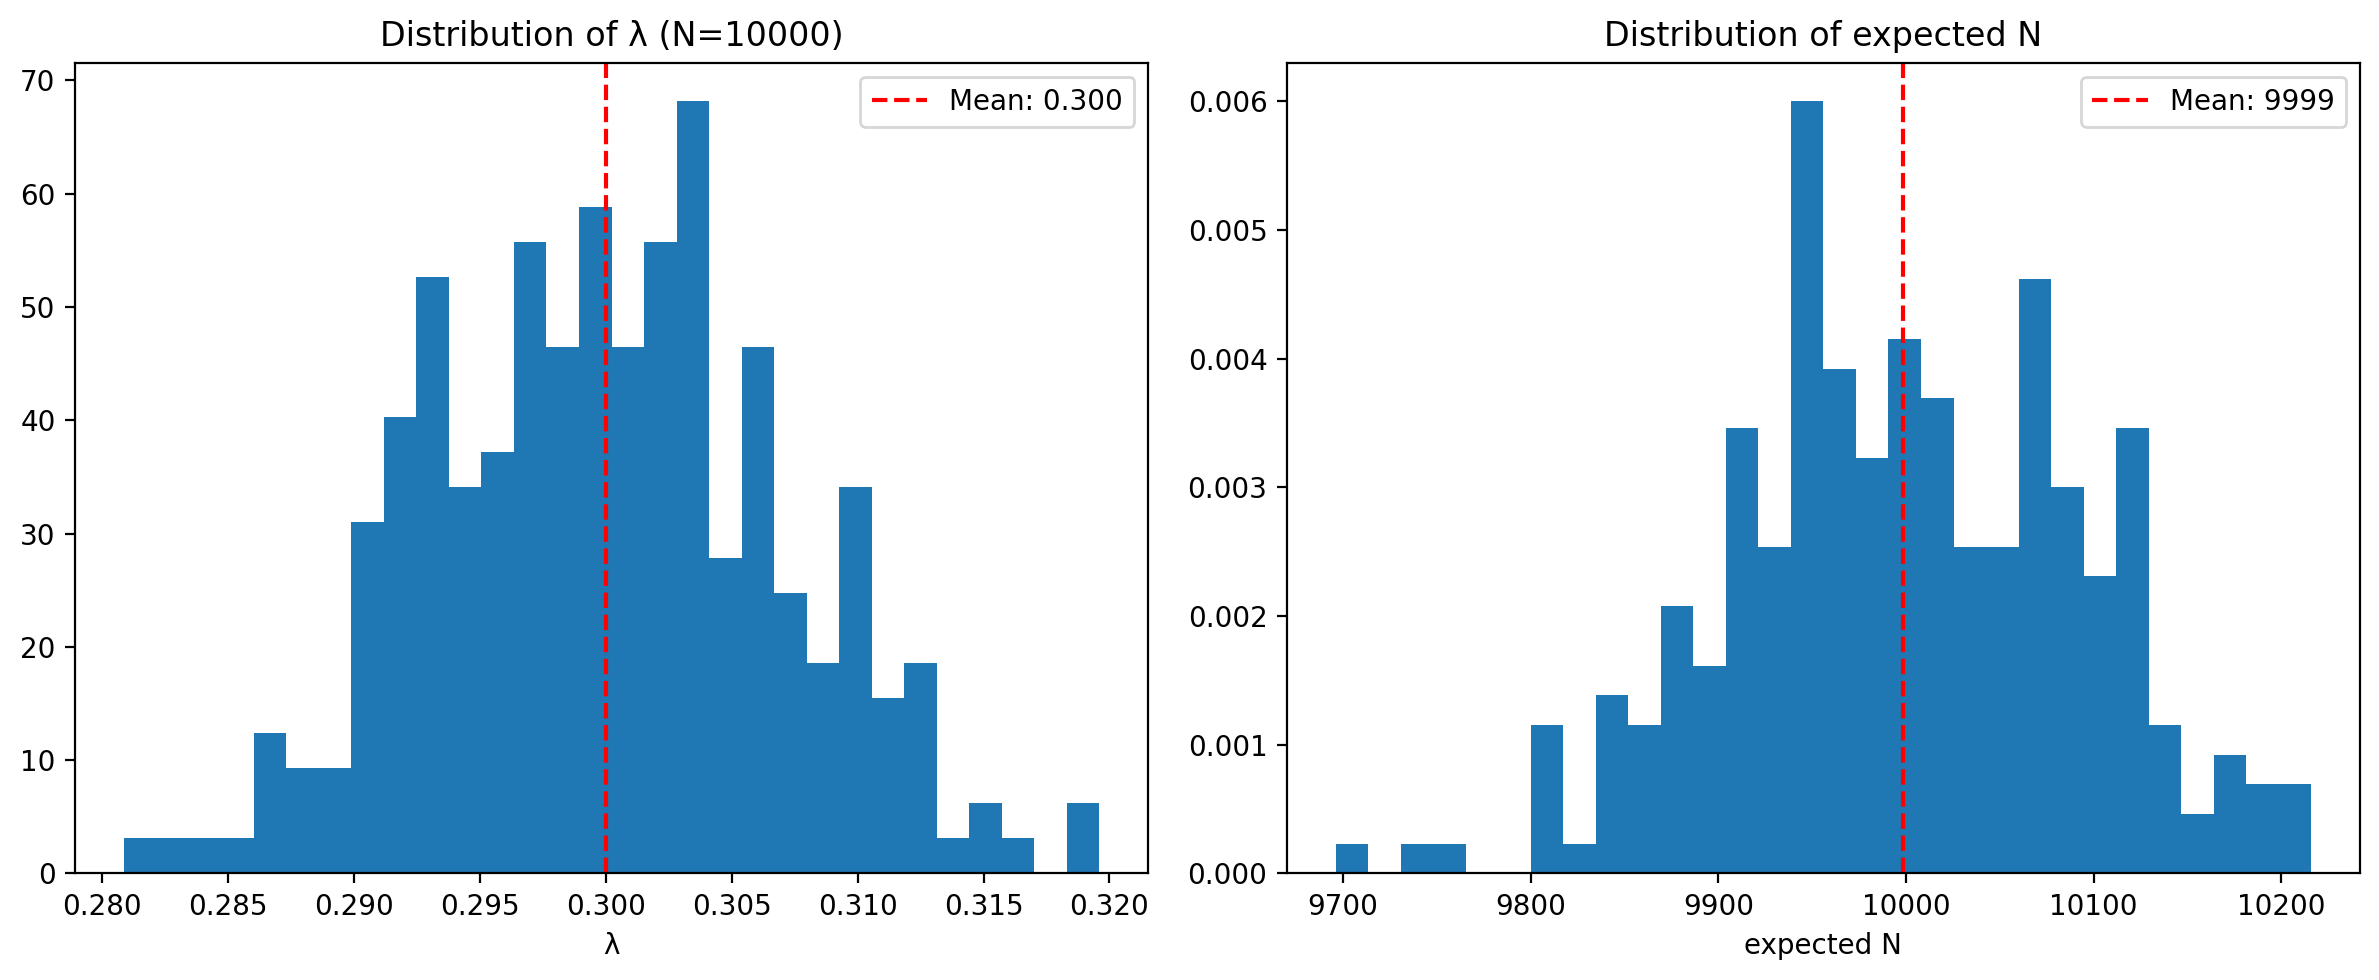

In [4]:
from src.generation import Generator
from src.fitting import Fitter
from src.bootstrap import Bootstrap, BootstrapResult
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

def distribution(results: BootstrapResult):
    """Analyse the distribution of fitted parameters for a single sample size"""

    matplotlib.rcParams['figure.dpi'] = 200
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # plot lambda distribution
    ax1.hist(results.lambda_hat, bins=30, density=True)
    ax1.axvline(results.lambda_mean, color='r', linestyle='--',
                label=f'Mean: {results.lambda_mean:.3f}')
    ax1.set_xlabel('λ')
    ax1.set_title(f'Distribution of λ (N={results.sample_size})')
    ax1.legend()
    
    # plot N_hat distribution
    ax2.hist(results.N_hat, bins=30, density=True)
    ax2.axvline(results.N_hat_mean, color='r', linestyle='--',
                label=f'Mean: {results.N_hat_mean:.0f}')
    ax2.set_xlabel('expected N')
    ax2.set_title('Distribution of expected N')
    ax2.legend()
    
    plt.tight_layout()
    return fig

# Set true parameters including n_expected
true_params = np.array([3, 0.3, 1, 1.4, 0.6, 0.3, 0, 2.5, 15000])

# Run bootstrap analysis
results = Bootstrap(true_params).toy_study()

# Analyse results
Bootstrap(true_params).uncertainties(results)

# Look at distribution for largest sample size
distribution(results[10000])

plt.show()



(f) sWeights.

    PDF normalisations:
	 0 1.0000000008729082
	 1 1.0000000000000002
    Integral of w*pdf matrix (should be close to the
                identity):
	[[ 1.00016423e+00 -2.48965623e-04]
	 [-1.65164487e-04  1.00025035e+00]]
    Check of weight sums (should match yields):
	Component  | sWeightSum |   Yield    |   Diff    |
	---------------------------------------------------
	  0        | 59863.1831 | 59863.1831 |     0.00% |
	  1        | 40136.8168 | 40136.8168 |     0.00% |
    PDF normalisations:
	 0 1.0000000008729082
	 1 1.0000000000000002
    Integral of w*pdf matrix (should be close to the
                identity):
	[[ 1.00016423e+00 -2.48965623e-04]
	 [-1.65164487e-04  1.00025035e+00]]
    Check of weight sums (should match yields):
	Component  | sWeightSum |   Yield    |   Diff    |
	---------------------------------------------------
	  0        | 59863.1831 | 59863.1831 |     0.00% |
	  1        | 40136.8168 | 40136.8168 |     0.00% |


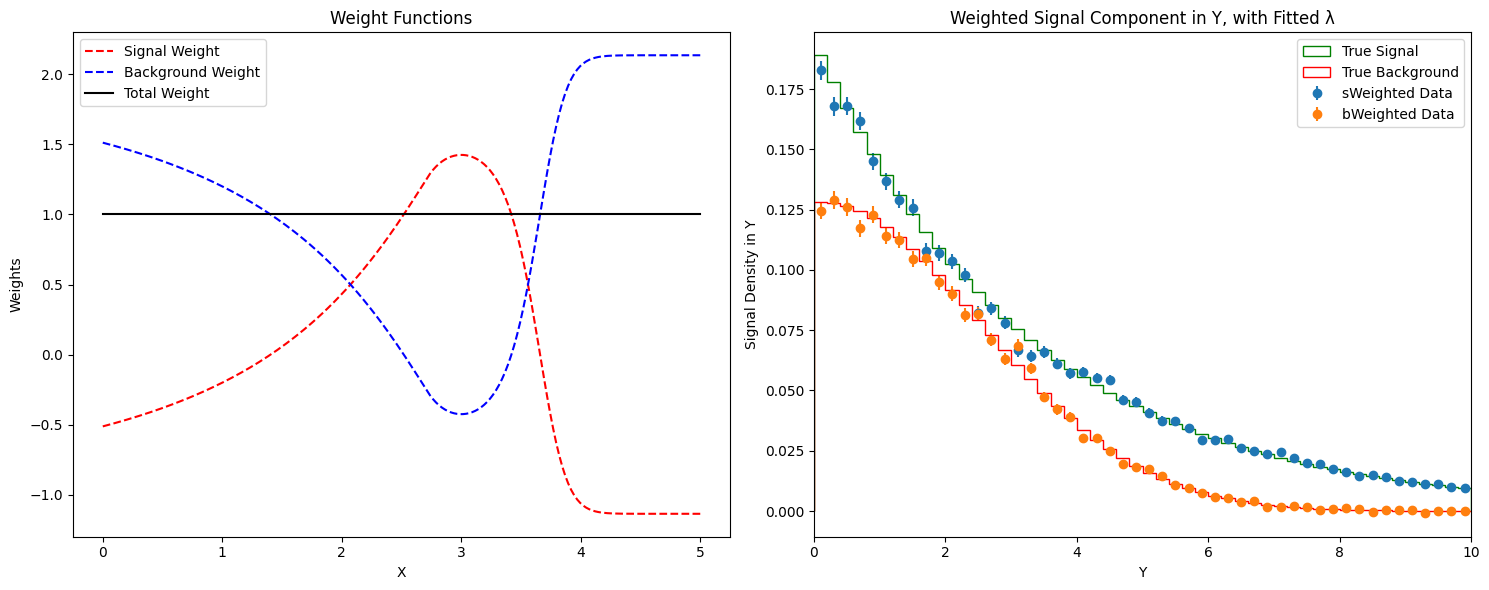

In [1]:
from src.generation import Generator
from src.sweight import Sweightor
import numpy as np
"""Main analysis function"""
# Generate data
true_params = np.array([3, 0.3, 1, 1.4, 0.6, 0.3, 0, 2.5])
N = 100000

generator = Generator(true_params)
x, y = generator.generate_sample(N)

# Perform sWeights analysis
sweightor = Sweightor(x, y)
result = sweightor.do_sWeight(true_params[5])

In [4]:
sweightor.plot_results(result, true_params)

print("\nsWeights Analysis Results:")
print(f"True λ: {true_params[5]:.4f}")
print(f"Estimated λ: {result.lambda_est:.4f} ± {result.lambda_err:.4f}")
print(f"Bias: {result.bias:.4f}")


sWeights Analysis Results:
-----------------------
True λ: 0.3000
Estimated λ: 0.2985 ± 0.0024
Bias: -0.0015
